## second order lag system

Reference:  
[1] http://y373.sakura.ne.jp/minami/pyctrl  
[2] "Pythonによる制御工学入門(第1版)", 南裕樹, オーム社  
[3] "Control Engineering: MATLAB Exercies", Laszlo.K et al, Springer  

Assuming that we have the system such that a trolly has mass $M$, a damper of viscosity $c$, and a spring $k$. When the force $f(t)$ is applied to this system, the equation of motion is obtained as following:

$$ M \ddot{y} + C \dot{y} + Ky = f(t) $$

$y(t)$ is output, and $f(t)$ is input for this system. Let us laplace-transform this equation:

$$ s^{2}MY(s) + sCY(s) + KY(s) = F(s) $$
$$ (s^{2}M + sC + K)Y(s) = F(s) $$
$$ \frac{Y(s)}{F(s)} = \frac{1}{(s^{2}M + sC + K)} $$

Before moving further, let us set several parameters below:
$$ \omega_n = \sqrt{\frac{K}{M}}, \zeta = \frac{C}{2\sqrt{MK}} $$
Then we get:
$$ \frac{Y(s)}{F(s)} = H(s) = \frac{K\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2} $$

Let us take a look at how this system responds for step input.

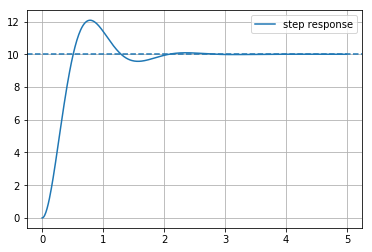

In [12]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

M, C, K = 0.5, 2, 10
zeta = C / (2 * np.sqrt(M*K))
omega = np.sqrt(K/M)

num = [K * omega**2]
den = [1, 2*zeta*omega, omega**2]

H = tf(num, den)
y, t = step(H, np.arange(0, 5, 0.01))

plt.plot(t, y, label="step response")
plt.axhline(K, linestyle='--')
plt.legend()
plt.grid()
plt.show()

Notice that $y(\infty)$ converges to $K = 10$. This can be shown by the final value theorem as following:
$$ y(\infty) = \lim_{t \to \infty} y(t) = \lim_{s \to 0} sY(s) =  \lim_{s \to 0} s\times\frac{K\omega_n^2}{(s^2 + 2\zeta\omega_n + \omega_n^2)s} = 10 $$

But later on I will also show that $y(\infty) = K$ in the time domain.  

What if we change the value of $\zeta$ and $\omega_n$, respectively?

1) $\zeta$ = 0.1, 0.4, 1.0
The graph below shows that $\zeta$ corresponds to how the response converges. The response vibrates and converges if $ 0 < \zeta < 1 $. It converges without vibration if $ 1 < \zeta $.

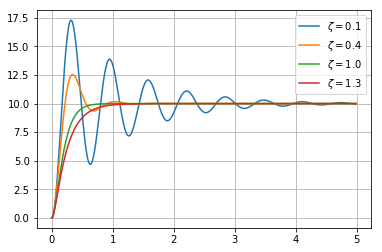

In [13]:
zeta_list = [0.1, 0.4, 1.0, 1.3]
omega = 10.0

for zeta in zeta_list:
    num = [K * omega**2]
    den = [1, 2*zeta*omega, omega**2]

    H = tf(num, den)
    y, t = step(H, np.arange(0, 5, 0.01))

    plt.plot(t, y, label="$\zeta=$"+str(zeta))
plt.legend()
plt.grid()
plt.show()

2) $\omega_n$ = 1.0, 5.0, 10.0 The graph below shows how fast the response converges. The larger $\omega_n$ is, the response converges faster.

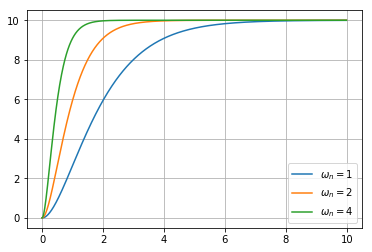

In [14]:
zeta = 1.0
omega_list = [1, 2, 4]

for omega in omega_list:
    num = [K * omega**2]
    den = [1, 2*zeta*omega, omega**2]

    H = tf(num, den)
    y, t = step(H, np.arange(0, 10, 0.01))

    plt.plot(t, y, label="$\omega_n=$"+str(omega))
plt.legend()
plt.grid()
plt.show()

3) what if $\zeta <= 0$ ?? Well, then the response diverges. This can be explained by looking into the $y(t)$ in the time domain. So hang on.

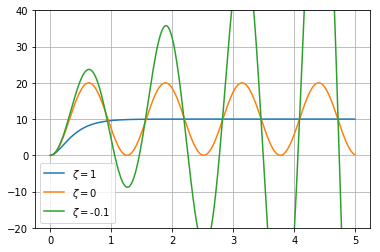

In [18]:
zeta_list = [1, 0, -0.1]
omega = 5.0

for zeta in zeta_list:
    num = [K * omega**2]
    den = [1, 2*zeta*omega, omega**2]

    H = tf(num, den)
    y, t = step(H, np.arange(0, 5, 0.01))

    plt.plot(t, y, label="$\zeta=$"+str(zeta))
plt.legend()
plt.grid()
plt.ylim(-20, 40)
plt.show()

We've discussed how the system behaves by detemining the output $Y(s)$ in the frequency domain. Can we obtain the actual function $y(t)$ in the time domain? To figure it out, let's take a look at $Y(s)$.

$$ Y(s) = \frac{K\omega_n^2}{s^{2} + 2\zeta\omega_n s + \omega_n^2}F(s) $$
Since $F(s) = 1/s$ if it's a step input, an output is now expressed as:
$$ Y(s) = \frac{K\omega_n^2}{(s^{2} + 2\zeta\omega_n s + \omega_n^2)s} $$
$$ Y(s) = \frac{K\omega_n^2}{(s-p_1)(s-p_2)s} $$
where
$$ p_1, p_2 = -\zeta\omega_n \pm \omega_n \sqrt{\zeta^2 - 1} $$

Now we've already known that: 
$$ y(t) = \mathscr{L}^{-1}[Y(s)] = \mathscr{L}^{-1}\left[\frac{K\omega_n^2}{(s-p_1)(s-p_2)s}\right] $$

We are able to get the result of partial fraction decomposition using sympy module:

In [9]:
# partial fraction decomposition
s = sp.Symbol('s')
p1 = sp.Symbol('p1')
p2 = sp.Symbol('p2')
t = sp.Symbol('t', positive=True)

H = 1/((s-p1)*(s-p2)*s)
P = sp.apart(H, s)
print(P)

1/(p2*(p1 - p2)*(p2 - s)) - 1/(p1*(p1 - p2)*(p1 - s)) + 1/(p1*p2*s)


Threfore, we obtain:
$$ Y(s) = \frac{K\omega_n^2}{p_1p_2}\left(\frac{p_2}{(p_1-p_2)(s-p_1)} - \frac{p_1}{(p_1-p_2)(s-p_2)} + \frac{1}{s}\right) $$

To get the output in the time domain, we just inverse-laplace-transform $Y(s)$:
$$ y(t) = \mathscr{L}^{-1}\left[Y(s)\right] = \frac{K\omega_n^2}{p_1p_2}\left(1 + \frac{p_2}{p_1-p_2}e^{p_1t} - \frac{p_1}{p_1-p_2}e^{p_2t}\right) $$

Note that
$$ p_1p_2 = \omega_n^2, p_1 - p_2 = 2\omega_n\sqrt{\zeta^2-1} $$

1. $ 1 < |\zeta|$ or $|\zeta| == 1$  
In this case, $p_1, p_2$ are both negative, real numbers. Threfore, $\lim_{t \to \infty}e^{p_1t} = 0$ and $\lim_{t \to \infty}e^{p_2t} = 0$. Therefore, $$y(\infty) = \frac{K\omega_n^2}{\omega_n^2}(1 + 0 + 0) = K$$

2. $ |\zeta| < 1 $  
In this case, $p_1, p_2$ are both complex number. Therefore,
$$ y(t) = K\left(1 + Ae^{(-\zeta\omega_n + i\omega_n\sqrt{1-\zeta})t} + Be^{(-\zeta\omega_n - i\omega_n\sqrt{1-\zeta})t}\right)$$
$$ A = \frac{p_2}{(p_1-p_2)}, B = \frac{-p_1}{(p_1-p_2)} $$

Then we can use Eular's fomula to convert the above into triangular function:  
$$ y(t) = K\left(1 + e^{-\zeta\omega_nt}\left(Ae^{i\bar{\omega_n}t} + Be^{i\bar{\omega_n}t}\right)\right) = K\left(1 +  e^{-\zeta\omega_nt}\left(C_1\cos{\bar{\omega_n}t} + C_2 \sin{\bar{\omega_n}t}\right)\right)$$
$$ where \: \bar{\omega_n} = \omega_n\sqrt{1-\zeta^2} $$

As you can see, this gives us the vibration response since it has $\cos, \sin$ in it.  

To verify the reuslt above, let us plot $y(t)$ obtained by the previous discussion.

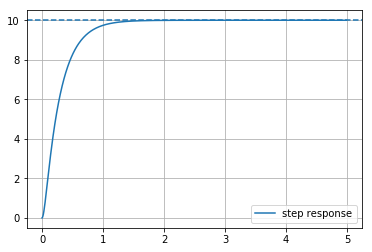

In [35]:
# 1 < |zeta|
zeta = 1.5
omega = 10.0
p1 = -zeta*omega + omega * np.sqrt(zeta**2 - 1)
p2 = -zeta*omega - omega * np.sqrt(zeta**2 - 1)
A = p2/(p1-p2)
B = -p1/(p1-p2)

y = lambda t: K * (1 + A*np.exp(p1*t) + B*np.exp(p2*t))  # y(t)

t = np.arange(0, 5, 0.01)
out = y(t)

plt.plot(t, out, label="step response")
plt.legend()
plt.axhline(K, linestyle="--")
plt.grid()
plt.show()

C:\Users\socre\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


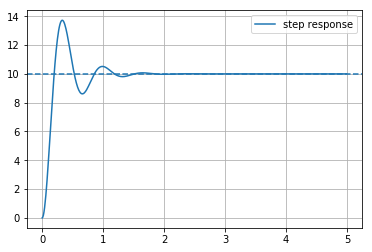

In [39]:
# |zeta| < 1
zeta = 0.3
omega = 10.0
p1 = -zeta*omega + 1j* omega * np.sqrt(1 - zeta**2)
p2 = -zeta*omega - 1j*omega * np.sqrt(1 - zeta**2)
A = p2/(p1-p2)
B = -p1/(p1-p2)
C1 = A + B
C2 = 1j * (A - B)  # be a real number in the end
omega_bar = omega * np.sqrt(1 - zeta**2)

y = lambda t: K * (1 + np.exp(-zeta*omega*t)*(C1*np.cos(omega_bar*t) + C2*np.sin(omega_bar*t)))

t = np.arange(0, 5, 0.01)
out = y(t)

plt.plot(t, out, label="step response")
plt.legend()
plt.axhline(K, linestyle="--")
plt.grid()
plt.show()